In [153]:
import pandas as pd 
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from datetime import datetime, timedelta
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [93]:
#locating the file/Path
filepath = r"/users/rsmart/Downloads/Real estate valuation data set.xlsx"

#changing the file stored into a dataFrame
def wrangle(filepath):
    df = pd.read_excel(filepath)
    
    df.rename(columns={"X5 latitude":"lat", "X6 longitude":"lon", "X1 transaction date":"Date", "X2 house age":"Age", 
    "X3 distance to the nearest MRT station":"dist", "X4 number of convenience stores":"stores",
    "Y house price of unit area":"price"}, inplace=True)
    #print("df shape:", df.shape)
    #print("df info:", df.info())
    #print("df head:", df.head())

    #Changing the date format from decimal date to year and month
    base = []
    for date in df["Date"]:
        start = date
        year = int(start)
        rem = start-year
        delta = (rem * 365) - 31
        base_date = datetime(year, 1, 1)
        period = (base_date + timedelta(delta)).strftime('%Y-%m')
        base.append(period)

    df1 = pd.DataFrame(base)
    df["TDate"] = df1
    df.drop(columns="Date", inplace=True)

    # Dropping outliers in the price column
    mask_price = df["price"] < 100
    df=df[mask_price]
    #df.set_index("TDate", inplace=True)

    return df

In [94]:
df = wrangle(filepath)
print(df.head())
print(df.info())

    Age       dist  stores       lat        lon  price    TDate
0  32.0   84.87882      10  24.98298  121.54024   37.9  2012-10
1  19.5  306.59470       9  24.98034  121.53951   42.2  2012-10
2  13.3  561.98450       5  24.98746  121.54391   47.3  2013-07
3  13.3  561.98450       5  24.98746  121.54391   54.8  2013-06
4   5.0  390.56840       5  24.97937  121.54245   43.1  2012-09
<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 413
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     413 non-null    float64
 1   dist    413 non-null    float64
 2   stores  413 non-null    int64  
 3   lat     413 non-null    float64
 4   lon     413 non-null    float64
 5   price   413 non-null    float64
 6   TDate   413 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 25.8+ KB
None


In [24]:
#determining how location varies with price
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="lon",
    width=800,
    height=800,
    color="dist",
    hover_data=["price"]

)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

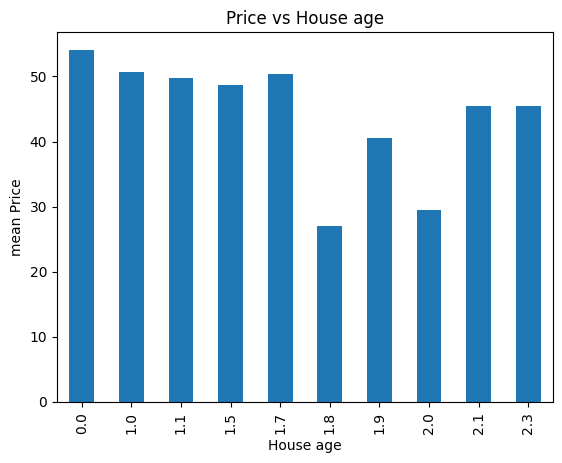

In [15]:
#Visualization of Price vs Building Age
mean_house_age = df.groupby("Age")["price"].mean().sort_index().head(10)
mean_house_age.plot(
    kind="bar",
    xlabel="House age",
    ylabel="mean Price",
    title="Price vs House age"
)
plt.show()

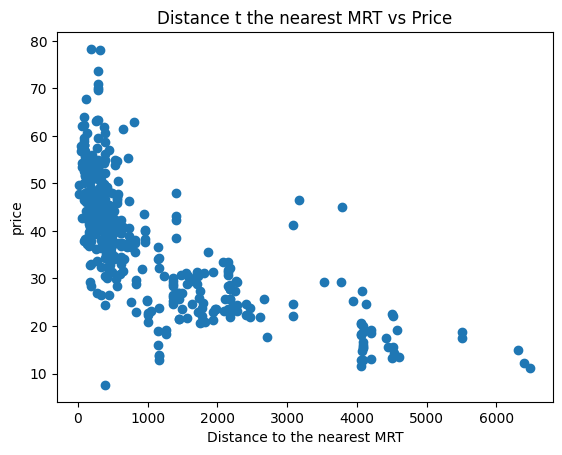

In [95]:
#Determining how distance to the MRT varies with Price
plt.scatter(x=df["dist"], y=df["price"])
plt.xlabel("Distance to the nearest MRT")
plt.ylabel("price")
plt.title("Distance t the nearest MRT vs Price")
plt.show() 

In [7]:
#Identifying the number of unique stores
#print(df["stores"].nunique())

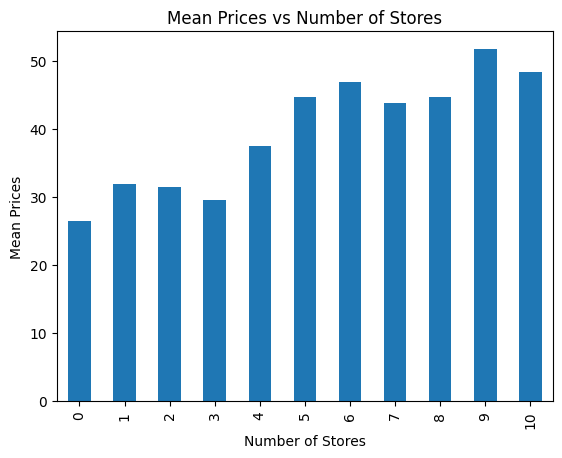

In [17]:
#Determining how the number of stores varies with price
mean_price_per_store = df.groupby("stores")["price"].mean()
mean_price_per_store.plot(
    kind="bar",
    xlabel="Number of Stores",
    ylabel="Mean Prices",
    title="Mean Prices vs Number of Stores"

)
plt.show()

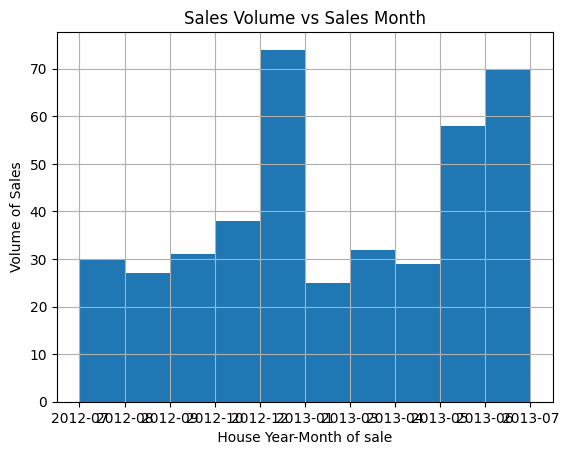

In [18]:
#visualization of the Number of transactions carried out in a month
df["TDate"].sort_values().hist()
plt.xlabel(" House Year-Month of sale ")
plt.ylabel("Volume of Sales")
plt.title("Sales Volume vs Sales Month")
plt.show()


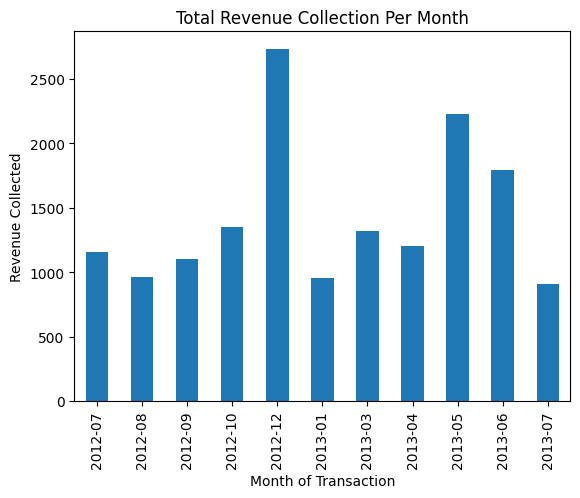

In [20]:
df.groupby("TDate")["price"].sum().plot(
    kind="bar",
    xlabel="Month of Transaction",
    ylabel="Revenue Collected",
    title="Total Revenue Collection Per Month"


)
plt.show()

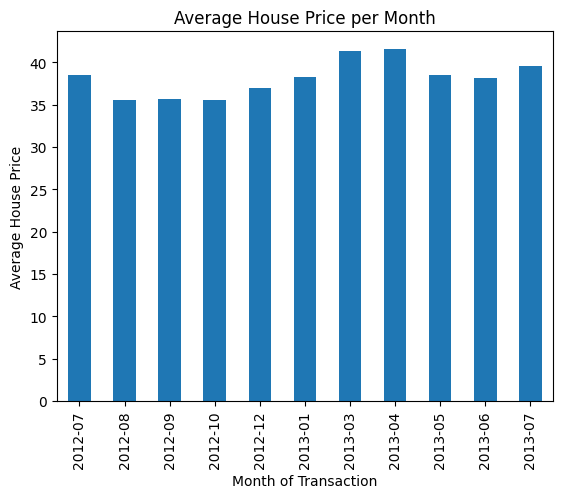

In [21]:
#Average House Prices per Month
df.groupby("TDate")["price"].mean().plot(
    kind="bar",
    xlabel="Month of Transaction",
    ylabel="Average House Price",
    title="Average House Price per Month"

)
plt.show()

In [97]:
#Correlation
#Distance from MRT Corr Price
Correlation_MRT = df["dist"].corr(df["price"])
print(f"Correlation_MRT: {Correlation_MRT}")

#Number of house stores Corr Price
correlation_store = df["stores"].corr(df["price"])
print(f"correlation_store: {correlation_store}")

#House Age Corr Price
correlation_age = df["Age"].corr(df["price"])
print(f"correlation_age: {correlation_age}")

Correlation_MRT: -0.6940089730153473
correlation_store: 0.6126352211777906
correlation_age: -0.2109849673356269


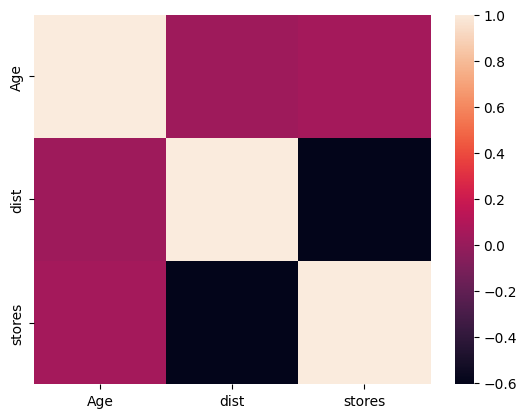

In [98]:
#Testing for Multicollinearity

correlation = df.select_dtypes("number").drop(columns=["price", "lat", "lon"]).corr()
sns.heatmap(correlation)
plt.show()

In [122]:
#Splitting the data into features and Target Matrix
target = "price"
y = df[target]
print(y.head())

features = ["lat", "lon", "dist", "stores", "Age"]
X = df[features]
print(f"X.head:, {X.head()}")

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: price, dtype: float64
X.head:,         lat        lon       dist  stores   Age
0  24.98298  121.54024   84.87882      10  32.0
1  24.98034  121.53951  306.59470       9  19.5
2  24.98746  121.54391  561.98450       5  13.3
3  24.98746  121.54391  561.98450       5  13.3
4  24.97937  121.54245  390.56840       5   5.0


In [123]:
#Splitting the Data into Training and Test DATA

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.05)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (392, 5)
y_train shape: (392,)
X_test shape: (21, 5)
y_test shape: (21,)


In [124]:

#Calculating mean of the training data

y_mean = y_train.mean()
print("Mean House Price:", y_mean)

Mean House Price: 37.94311224489796


In [125]:
#Setting a baseline for the y predictions
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[37.94311224489796,
 37.94311224489796,
 37.94311224489796,
 37.94311224489796,
 37.94311224489796]

In [128]:
# Calculating the Mean Absolute Error for the Baseline
Mean_Absolute_Error = mean_absolute_error(y_train, y_pred_baseline)
print("Baseline Mean_Absolute_Error:", round(Mean_Absolute_Error, 5))

Baseline Mean_Absolute_Error: 10.56766


In [129]:
#Instantiating the Model
Model = LinearRegression()

In [130]:
#Fitting the Model to Training and Test Data
Model.fit(X_train, y_train)

LinearRegression()

In [133]:
#Evaluating the Model
# Model predictions on Training
y_pred_training = pd.Series(Model.predict(X_train))
y_pred_training[:5]

0    33.194103
1    39.841150
2    32.381263
3    42.627486
4    47.689756
dtype: float64

In [132]:
#calculating Mean Absolute Error of the Training Data
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 5))

Training MAE: 6.06183


In [135]:
#Model Testing with Test Data
y_pred_test = pd.Series(Model.predict(X_test))
y_pred_test[:5]

0    40.336739
1    41.688133
2    33.324472
3    30.726145
4    51.556434
dtype: float64

In [139]:
# Communicating the Model Results
#Extracting the Intercept
intercept = round(Model.intercept_, 2)
print("Model Intercept:", intercept)


Model Intercept: -7315.73


In [151]:
#Extracting the Coefficients
coefficient = Model.coef_
print("Model Coefficients:", coefficient)

Model Coefficients: -0.25636367565295226


In [152]:
#Communicating Results.

intercept = round(Model.intercept_, 2)
print(f"House price={intercept} + ({coefficient[0]}*lat) + ({coefficient[1]}*lon) + ({coefficient[2]}*dist) + ({coefficient[3]}*stores) + ({coefficient[3]}*Age)")

House price=-7315.73 + (228.5761804483946*lat) + (13.57572990396466*lon) + (-0.0038406187384403268*dist) + (1.2596066566561979*stores) + (1.2596066566561979*Age)


In [154]:
#Save Model
with open("RealEstateValuation-1.pkl", "wb") as f:
    pickle.dump(Model, f)